In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

def load_and_preprocess_images(saltwater_dir, clearwater_dir, num_images=499):
    saltwater_images = os.listdir(saltwater_dir)[:num_images]
    clearwater_images = os.listdir(clearwater_dir)[:num_images]
    processed_images = []

    for salt_img_name, clear_img_name in zip(saltwater_images, clearwater_images):
        salt_img_path = os.path.join(saltwater_dir, salt_img_name)
        clear_img_path = os.path.join(clearwater_dir, clear_img_name)
        
        salt_img = cv2.imread(salt_img_path)
        clear_img = cv2.imread(clear_img_path)
        
        if salt_img is not None and clear_img is not None:
            diff_img = salt_img.astype('float32') - clear_img.astype('float32')
            normalized_img = diff_img / 255.0
            processed_images.append(normalized_img)

    return np.array(processed_images)



In [2]:
csv_file_path = '/Users/tarunangalla/Desktop/updated_SALT_DATA_no_first_two_columns.csv'  
ppm_values = pd.read_csv(csv_file_path)['PPM values'].values  


ppm_min = ppm_values.min()
ppm_max = ppm_values.max()
normalized_ppm = (ppm_values - ppm_min) / (ppm_max - ppm_min)

saltwater_dir = '/Users/tarunangalla/Desktop/salt'
clearwater_dir = '/Users/tarunangalla/Desktop/clearwater'

images = load_and_preprocess_images(saltwater_dir, clearwater_dir, num_images=500)
print("Total Images Loaded:", len(images))

normalized_ppm = normalized_ppm[:len(images)]

X_train, X_test, y_train, y_test = train_test_split(images, normalized_ppm, test_size=0.1, random_state=42)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

test_loss = model.evaluate(X_test, y_test)
print('Test Loss for salt :', test_loss)






Total Images Loaded: 500


2023-12-13 23:51:26.761410: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2023-12-13 23:51:26.761441: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2023-12-13 23:51:26.761446: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2023-12-13 23:51:26.761678: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-13 23:51:26.761695: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/20


2023-12-13 23:51:37.296790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - ETA: 0s - loss: 0.0236

2023-12-13 23:52:42.567764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 67s 5s/step - loss: 0.0236 - val_loss: 0.0187
Epoch 2/20
13/13 [==============================] - 68s 5s/step - loss: 0.0110 - val_loss: 0.0098
Epoch 3/20
13/13 [==============================] - 69s 5s/step - loss: 0.0111 - val_loss: 0.0103
Epoch 4/20
13/13 [==============================] - 68s 5s/step - loss: 0.0106 - val_loss: 0.0124
Epoch 5/20
13/13 [==============================] - 68s 5s/step - loss: 0.0106 - val_loss: 0.0122
Epoch 6/20
13/13 [==============================] - 68s 5s/step - loss: 0.0106 - val_loss: 0.0117
Epoch 7/20
13/13 [==============================] - 66s 5s/step - loss: 0.0106 - val_loss: 0.0120
Epoch 8/20
13/13 [==============================] - 66s 5s/step - loss: 0.0106 - val_loss: 0.0115
Epoch 9/20
13/13 [==============================] - 66s 5s/step - loss: 0.0106 - val_loss: 0.0120
Epoch 10/20
13/13 [==============================] - 68s 5s/step - loss: 0.0106 - val_loss: 0.0121
Epoch 11/20
13/13 [===========

In [3]:
def mean_absolute_error(actual, predicted):
    return np.mean(np.abs(actual - predicted))

def mean_squared_error(actual, predicted):
    return np.mean(np.square(actual - predicted))

def root_mean_squared_error(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))


predictions = model.predict(X_test)

mae_score = mean_absolute_error(y_test, predictions)
mse_score = mean_squared_error(y_test, predictions)
rmse_score = root_mean_squared_error(y_test, predictions)

print('Mean Absolute Error:', mae_score)
print('Mean Squared Error:', mse_score)
print('Root Mean Squared Error:', rmse_score)

1/2 [==============>...............] - ETA: 0s

2023-12-14 00:14:06.330071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 766ms/step
Mean Absolute Error: 0.09138502327638987
Mean Squared Error: 0.017770434545301805
Root Mean Squared Error: 0.13330579336736195


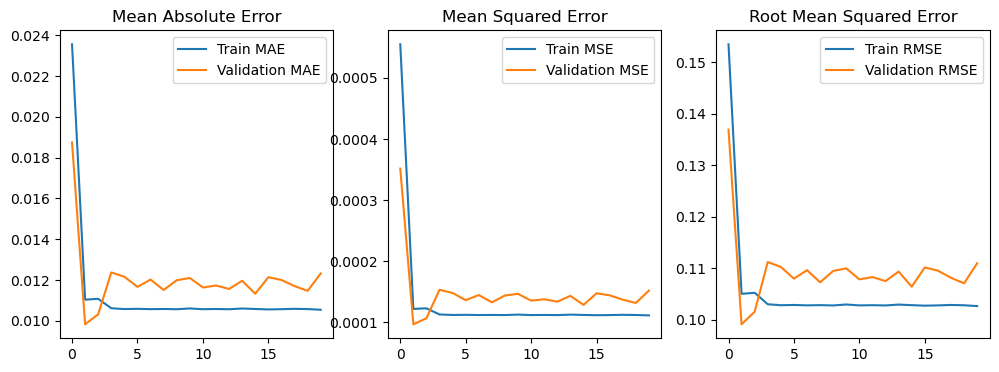

In [5]:
import matplotlib.pyplot as plt


rmse_train = np.sqrt(history.history['loss'])
rmse_val = np.sqrt(history.history['val_loss'])


plt.figure(figsize=(12, 4))


plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train MAE')
plt.plot(history.history['val_loss'], label='Validation MAE')
plt.title('Mean Absolute Error')
plt.legend()


plt.subplot(1, 3, 2)
plt.plot(np.square(history.history['loss']), label='Train MSE')
plt.plot(np.square(history.history['val_loss']), label='Validation MSE')
plt.title('Mean Squared Error')
plt.legend()


plt.subplot(1, 3, 3)
plt.plot(rmse_train, label='Train RMSE')
plt.plot(rmse_val, label='Validation RMSE')
plt.title('Root Mean Squared Error')
plt.legend()

plt.show()
